# Homework 5
## By Vyanna Hill

### Chapter 10

In [22]:
#Code derived from Chapter 10 by allen 
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html


filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
table2.shape

census = table2.census / 1e9
census.shape

un = table2.un / 1e9
un.shape

table2.index
table2.columns
table2.values
census.name
census.values
census.index

type(table2)
type(table2.index)
type(table2.columns)
type(table2.values)
type(census)
type(census.index)
type(census.values)


numpy.ndarray

### Chapter 11

In [32]:
#code derived from Chapter 11

init = State(S=89, I=1, R=0)

def make_system(beta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=89, I=1, R=0)
    init /= sum(init)

    t0 = 0
    t_end = 7 * 14

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma)


tc = 3      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

system = make_system(beta, gamma)


def update_func(state, t, system):
    """Update the SIR model.
    
    state: State with variables S, I, R
    t: time step
    system: System with beta and gamma
    
    returns: State object
    """
    s, i, r = state

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    system: System object
    update_func: function that updates state
    
    returns: State object for final state
    """
    state = system.init
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, t, system)
        
    return state
#first week S=59.3333
state = update_func(init, 0, system)

# After 14 weeks S= .52068
run_simulation(system, update_func)



,values
S,59.333333
I,30.416667
R,0.250000


Exercise 1
    Suppose the time between contacts is 4 days and the recovery time is 5 days. After 14 weeks, how many students, total, have been infected?

Hint: what is the change in S between the beginning and the end of the simulation?

In [35]:
#changing times of contact and reovery
tc = 4      # time between contacts in days 
tr = 5      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

system = make_system(beta, gamma)
state = update_func(init, 0, system)

#first week S=88.75
state = update_func(init, 0, system)

#last of the 14 weeks S.610171
run_simulation(system, update_func)



,values
S,0.610171
I,0.004672
R,0.385157


61 % of the student population was not infected after the end of the semester. There were a total of 90 students, so around 54 students did not get infected. So, 36 students were infected over the semester.

Exercise 2
    Suppose the time between contacts is 4 days and the recovery time is 5 days. Simulate this scenario for 14 weeks and plot the results

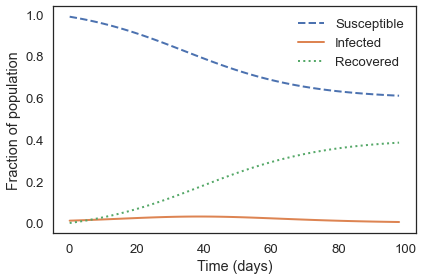

In [39]:
#code derived from Chapter 11
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

#changing the contact and recovery time

tc = 4      # time between contacts in days 
tr = 5      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

system = make_system(beta, gamma)
results = run_simulation(system, update_func)
plot_results(results.S, results.I, results.R)

